<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/mds%20homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 1

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа (решение на бумажке и на python).

как я понял если выпадает решка то 0 иначе 1
подбрасываем 15 раз - считаем сумму и так несколько раз,
смотрим статистику



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn
import math

from numpy.random import choice
from scipy.stats import *

%matplotlib inline

def isPrime(n):
  if n % 2 == 0:
        return n == 2
  d = 3
  while d * d <= n and n % d != 0:
       d += 2
  return d * d > n

In [0]:
# расчет перебором
def test(num):
  varh = 0
  for j in range(num):
    if isPrime(sum([choice([0,1]) for i in range(15)])):
      varh += 1
  return varh/num

print(test(1000000))    


0.35001


Сумма подбросов может быть 0-15 всего из этого списка Простые числа: 0,1,2,3,5,7,11,13
Если взять вероятности выпадения каждого из этих Чисел и сложить, то получится вероятность выпадения простого числа
Формула выпадения каждого из этих чисел :
Формула распределения Бернули
$P = (n!/k!/(n-k)!*p^k*(1-p)^(n-k)$

где p=0,5 n = 15, k - требуемые числа



In [0]:
# расчет по формуле "руками"
prime = [0,1,2,3,5,7,11,13]
sum([ math.factorial(15)/math.factorial(i)/math.factorial(15-i)*0.5**i*0.5**(15-i) for i in prime])

0.3504638671875

In [0]:
# расчет функцией
p=0.5
n=15
prime = [0,1,2,3,5,7,11,13]
sum(binom.pmf(prime, n, p))

0.3504638671875009

### Задание 2

Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

10 подбрасываний кости с 6 гранями от 1 до 6


mean 9.774
std 2.7653072162058234
median 10.0


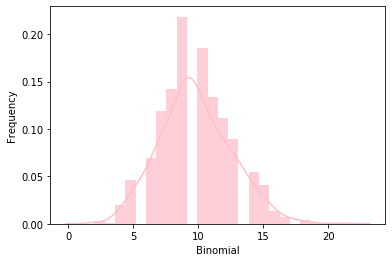

In [0]:
data=binom.rvs(n=60,p=1/6,size=1000)
ax=seaborn.distplot(data,
                kde=True,
                color='pink',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Binomial',ylabel='Frequency')
print('mean',data.mean())
print('std',data.std())
print('median',np.median(data))

### Задание 3

Задача с 17-го слайда лекции про 3 монеты. Покажите, почему 3 события являются попарно независимыми, но <b>не</b> являются независимыми в совокупности.

$P(A1UA2) = P(A1) * P(A2)$ - каждая пара отдельно независима

$P(A2UA3) = P(A2) * P(A3)$

$P(A1UA3) = P(A1) * P(A3)$  - но если первые 2 пары определились, то A2 в первой паре должна быть такой же как A2 во второй паре, что разрушает предположение что общая совокупность независима.
В совокупности все монеты должны падать только одной стороной


### Задание 4 (формула полной вероятности)

В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

вероятность купить деталь первого завода 20%, а деталь первого завода и хороего качества - 20%*10% - 2%
вероятность купить детать второго завода 30%, а деталь второго завода и хорошего качества - 30%*5% - 1,5%
вероятность купить деталь третьего завода 50%, а деталь третьего завода и хороего качества - 50%*20% - 10%
вероятность купить деталь хорошего качества - 2+ 1,5 + 10 = 13,5%
Формула полной вероятности  
и все вместе - это полная группа событий 11 слайд презентации
